# 3a)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
y = df['secchi_depth']
sigma = 10
lam = 0.01
n = len(x)

In [2]:
def KERNEL(X, sigma):
    distsq = np.zeros((n, n),dtype = float)
    for i in range(0, n):
        for j in range(0, n):
            d = np.linalg.norm(X[i] - X[j])
            distsq[i, j] = d**2
    K = np.exp(-distsq/(2*sigma**2))
    return K

def alpha(kernmat, lam):
    alpha = np.linalg.inv(kernmat + lam*np.identity(n))@y
    return alpha

In [3]:
kernmat = KERNEL(x, sigma)
alphamat = alpha(kernmat, lam)
Yhat = kernmat@alphamat


Text(0.5, 1.0, 'Data of Kernel fit')

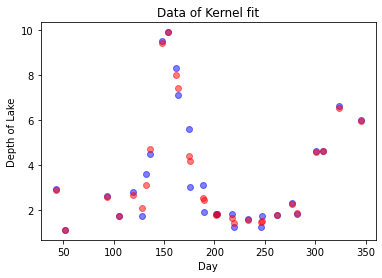

In [5]:
plt.plot(x, y, 'bo',label= 'Measured Data', alpha = 0.5)
plt.plot(x, Yhat, 'ro',label= 'Kernel Fit', alpha = 0.5)
plt.xlabel('Day')
plt.ylabel('Depth of Lake')
plt.title('Data of Kernel fit')

The resulting fit approximates the measured data very well in the middle of the dataset (days), in the start it overshoots it by a little and in the end it also tapers off the actual data by quite a lot. The parameters thus underfit the data as some notable features are not taken.

# 3b)

We can use k-fold cross validation to get better values of sigma and lambda. Since we can iterate through sigma values, and find the error at each value of sigma we can use that advantage to compare the errors and find the lowest. The error graph should have a local minima and that is the desired value of sigma for us.

We can run a similar experiment for lamda values, finding the minima of the error graph and thus finding the appropriate lamda.